In [52]:
using EMIRT
using Watershed
using Agglomeration
using Process
using ImageView
include(joinpath(Pkg.dir(), "EMIRT/plugins/show.jl"))

scriptplot (generic function with 1 method)

### read affinity, segment, evaluate

In [47]:
faff = "../assets/aff.h5" #ARGS[1]
flbl = "../assets/lbl.h5" #ARGS[2]
fimg = "/opt/znn-release/dataset/allen/Allen06_raw.h5"
faff = "/usr/people/jingpeng/seungmount/research/Jingpeng/13_neuromancer/allen06/compare/gaffs_06.h5"
flbl = "/opt/znn-release/dataset/allen/Allen06_lbl.h5"

fimg = "/usr/people/jingpeng/seungmount/research/kisuklee/Sharing/Jingpeng/blend_test/img/chunk_33405_8905_229.img.h5"
faff = "/usr/people/jingpeng/seungmount/research/kisuklee/Sharing/Jingpeng/blend_test/Ensemble/chunk_33405_8905_229.aff.h5"
# faff = "/usr/people/jingpeng/seungmount/research/kisuklee/Sharing/Jingpeng/blend_test/JNet/chunk_33405_8905_229.aff.h5"
flbl = "/usr/people/jingpeng/seungmount/Omni/TracerTasks/ZFishEnsembleValidation/zfish_chunk_33405_8905_229.omni.seg.ben.h5"

"/usr/people/jingpeng/seungmount/Omni/TracerTasks/ZFishEnsembleValidation/zfish_chunk_33405_8905_229.omni.seg.ben.h5"

In [48]:
aff = readaff(faff)
lbl = readseg(flbl)

seg = atomicseg(aff; is_threshold_relative=true)
segmentPairs, segmentPairAffinities = Process.forward(aff, seg)
sgm = EMIRT.SegMST(seg, segmentPairs, segmentPairAffinities)

errorcurve = sgm2ec(sgm, lbl, 0:0.2:1)

INFO: use percentage threshold


watershed, low: 0.011188, high: 0.999852
steepestascent...
divideplateaus...
findbasins!
found: 2634396 components
regiongraph...
Region graph size: 12581227
Region graph size: 12581227
mergeregions...
Done with merging
Done with remapping, total: 9476 regions
Done with updating the region graph, size: 55280
merge 8800, 0.11711544710292365
Merged to 585 regions


Dict{Symbol,Array{Float32,1}} with 17 entries:
  :VIm   => Float32[7.22127f0,1.7803992f0,0.41245148f0,0.34911993f0,0.3100928f0…
  :rfs   => Float32[0.53662485f0,0.51211154f0,0.3522758f0,0.247995f0,0.12662487…
  :VIS   => Float32[-9.559952f0,-4.740265f0,-5.7994537f0,-9.659763f0,-14.431667…
  :res   => Float32[0.4340598f0,0.4570223f0,0.6067461f0,0.70442957f0,0.81812125…
  :re    => Float32[1.3507884f0,0.63256323f0,0.6178114f0,0.7108228f0,0.8196673f…
  :VIFSs => Float32[0.8843346f0,0.8873738f0,0.8208809f0,0.72665906f0,0.6370969f…
  :rim   => Float32[0.5026754f0,0.4797129f0,0.3299891f0,0.23230565f0,0.11861396…
  :rem   => Float32[0.9167286f0,0.17554092f0,0.011065304f0,0.006393254f0,0.0015…
  :VI    => Float32[9.559952f0,4.740265f0,5.7994537f0,9.659763f0,14.431667f0,15…
  :ris   => Float32[-0.8534638f0,-0.11227614f0,0.052199543f0,0.056871533f0,0.06…
  :rfm   => Float32[0.3541454f0,0.7321024f0,0.9675556f0,0.97321624f0,0.9871337f…
  :VIs   => Float32[2.338764f0,2.9602344f0,5.3880286f0,9.31242

### overlay raw image with ground truth and segmentation

In [24]:
run(`julia overlay_img_seg.jl $fimg $flbl`)


Use "AbstractVecOrMat{T}(" instead.


compare image and segmentation
Usage: julia compare_img_seg.jl /path/of/img.h5 /path/of/seg.h5


    ./(AbstractArray, Union{DataArrays.DataArray, DataArrays.PooledDataArray}) at /usr/people/jingpeng/.julia/v0.4/DataArrays/src/broadcast.jl:287
is ambiguous with: 
    ./(Images.AbstractImageDirect, AbstractArray) at /usr/people/jingpeng/.julia/v0.4/Images/src/algorithms.jl:55.
To fix, define 
    ./(Images.AbstractImageDirect, Union{DataArrays.DataArray, DataArrays.PooledDataArray})
before the new definition.
    .+(AbstractArray, Union{DataArrays.DataArray, DataArrays.PooledDataArray}, AbstractArray...) at /usr/people/jingpeng/.julia/v0.4/DataArrays/src/broadcast.jl:299
is ambiguous with: 
    .+(Images.AbstractImageDirect, AbstractArray) at /usr/people/jingpeng/.julia/v0.4/Images/src/algorithms.jl:22.
To fix, define 
    .+(Images.AbstractImageDirect, Union{DataArrays.DataArray, DataArrays.PooledDataArray})
before the new definition.
    -(AbstractArray, DataArrays.DataArray) at /usr/people/jingpeng/.julia/v0.4/DataArrays/src/operators.jl:276
is ambiguous with: 
    -(Images.Abst

In [31]:
saveseg("/tmp/seg.h5", segment(sgm, 0.6))
run(`julia overlay_img_seg.jl $fimg /tmp/seg.h5`)


Use "AbstractVecOrMat{T}(" instead.


compare image and segmentation
Usage: julia compare_img_seg.jl /path/of/img.h5 /path/of/seg.h5


    ./(AbstractArray, Union{DataArrays.DataArray, DataArrays.PooledDataArray}) at /usr/people/jingpeng/.julia/v0.4/DataArrays/src/broadcast.jl:287
is ambiguous with: 
    ./(Images.AbstractImageDirect, AbstractArray) at /usr/people/jingpeng/.julia/v0.4/Images/src/algorithms.jl:55.
To fix, define 
    ./(Images.AbstractImageDirect, Union{DataArrays.DataArray, DataArrays.PooledDataArray})
before the new definition.
    .+(AbstractArray, Union{DataArrays.DataArray, DataArrays.PooledDataArray}, AbstractArray...) at /usr/people/jingpeng/.julia/v0.4/DataArrays/src/broadcast.jl:299
is ambiguous with: 
    .+(Images.AbstractImageDirect, AbstractArray) at /usr/people/jingpeng/.julia/v0.4/Images/src/algorithms.jl:22.
To fix, define 
    .+(Images.AbstractImageDirect, Union{DataArrays.DataArray, DataArrays.PooledDataArray})
before the new definition.
    -(AbstractArray, DataArrays.DataArray) at /usr/people/jingpeng/.julia/v0.4/DataArrays/src/operators.jl:276
is ambiguous with: 
    -(Images.Abst

In [113]:
include(joinpath(Pkg.dir(), "EMIRT/plugins/utils.jl"))
# ec2df(ecs[:jnet])
df = ecs2df(ecs)
ecs[:jnet]
df

metrics = [:VIm,:rfs,:VIS,:res,:re,:VIFSs,:rim,:rem,:VI,:ris,:rfm,:VIs,:thd,:VIFS,:rf,:VIFSm,:ri]


LoadError: LoadError: InexactError()
while loading In[113], in expression starting on line 3

In [108]:
collect(keys(first(values(ecs))))
# Vector{Symbol}(keys(values(ecs)[1]))

17-element Array{Symbol,1}:
 :VIm  
 :rfs  
 :VIS  
 :res  
 :re   
 :VIFSs
 :rim  
 :rem  
 :VI   
 :ris  
 :rfm  
 :VIs  
 :thd  
 :VIFS 
 :rf   
 :VIFSm
 :ri   

### plot the evaluation measurements

In [59]:
# ecs = ScoreCurves()
append!(ecs, errorcurve, :ensemble)
#ecs = ec2ecs(errorcurve)
# transform to dataform
df = ecs2df(ecs)

LoadError: LoadError: MethodError: `append!` has no method matching append!(::Dict{Symbol,Array{Float32,1}}, ::Dict{Symbol,Array{Float32,1}})
Closest candidates are:
  append!(::Dict{Symbol,Array{Float32,1}}, !Matched::Symbol, !Matched::Float32)
  append!(::Dict{Symbol,Array{Float32,1}}, !Matched::Float32, !Matched::Float32, !Matched::Float32, !Matched::Float32, !Matched::Float32, !Matched::Float32, !Matched::Float32)
  append!(::Dict{Symbol,Array{Float32,1}}, !Matched::Float32, !Matched::Dict{Symbol,Float32})
  ...
while loading In[59], in expression starting on line 2

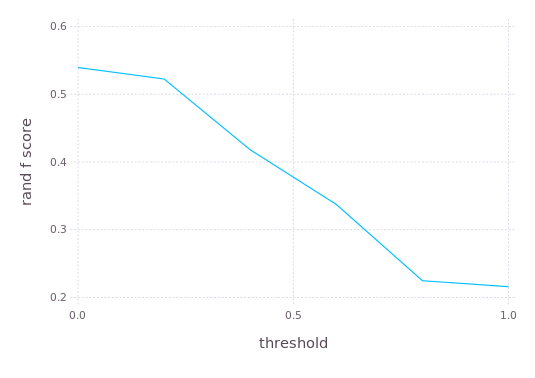

In [73]:
plot(df, x="thd", y="rf", Geom.line,
               Guide.xlabel("threshold"),
               Guide.ylabel("rand f score"))

In [46]:
plot(df, x="thd", y="re", Geom.line,
               Guide.xlabel("threshold"),
               Guide.ylabel("rand error"))

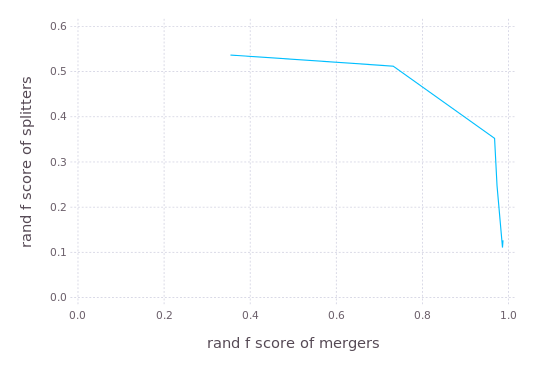

In [37]:
plot(df, x="rfm", y="rfs", Geom.line,
                 Guide.xlabel("rand f score of mergers"),
                 Guide.ylabel("rand f score of splitters"))

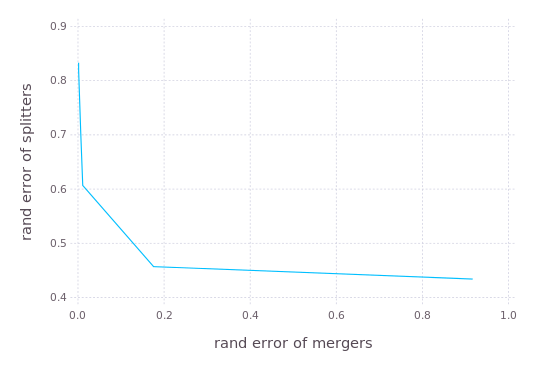

In [41]:
plot(df, x="rem", y="res", Geom.line,
                 Guide.xlabel("rand error of mergers"),
                 Guide.ylabel("rand error of splitters"))